# 1. Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : **Rafif Dwiputra**

Batch : **FTDS-016-RMT**

Dataset : Telco Customer Churn

Objective : Build predictive customer telco subscribed model with ANN

# 2. Import Libraries

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

# 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The contain of dataset is:

1. Customer ID : ID of each customer
2. gender : Whether the customer is a male or a female
3. SeniorCitizen : Whether the customer is a senior citizen or not (1,0)
4. Partner : Whether the customer has a partner or not (Yes, No)
5. Dependents : Whether the customer has dependents or not (Yes, No)
6. tenure : Number of months the customer has stayed with the company
7. PhoneService : Whether the customer has a phone service or not (Yes, No)
8. MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract : The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges : The amount charged to the customer monthly
20. TotalCharges : The total amount charged to the customer
21. Churn : Whether the customer churned or not (Yes or No)

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Melihat 5 data pertama pada dataset

In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Melihat 5 data terakhir dari dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Tidak ada missing value pada dataset, tetapi kolom TotalCharges memiliki type data yang salah, seharusnya numerical. Maka, TotalCharges akan diubah menjadi numerical.

In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Setelah diconvert menjadi numerical, TotalCharges memiliki missing value. Lakukan pengecekan pada missing value nya.

In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges memiliki 11 missing value setelah dilakukan pengecekan dan akan dilakukan penginputan median pada missing value nya.

# 4. Exploratory Data Analysis (EDA)

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Barplot SeniorCitizen


<Figure size 1440x360 with 0 Axes>

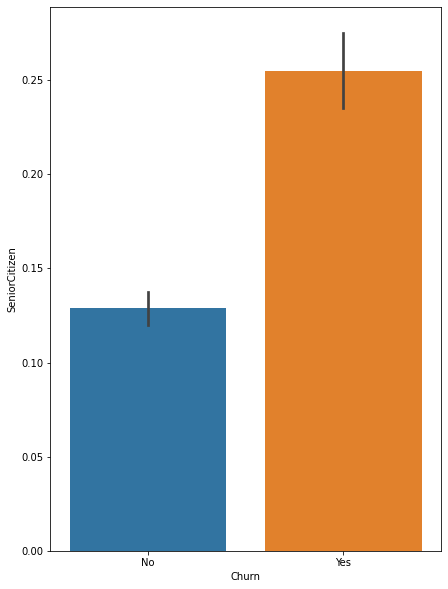



Barplot tenure


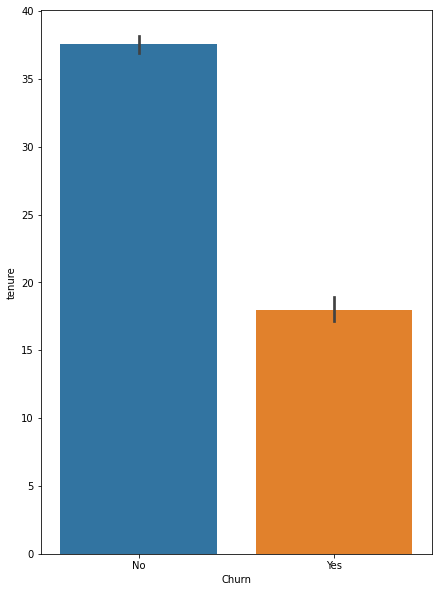



Barplot MonthlyCharges


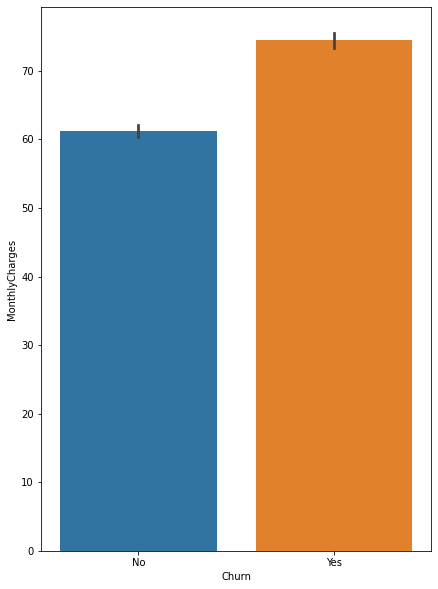

In [8]:
plt.figure(figsize=(20,5))
columns = ['SeniorCitizen','tenure', 'MonthlyCharges']
n = 1
for x in columns:
    plt.figure(figsize=(7,10))
    print('Barplot', x)
    sns.barplot(data=data, x='Churn', y=x)
    plt.xlabel('Churn')
    plt.ylabel(x)
    n=n+1
    plt.show()
    print('\n')

Barplot menunjukan bahwa :
- dari SeniorCitizen kolom, Jumlah Customer Churn paling banyak adalah dengan label 1 yaitu senior citizen.

- Dari tenure kolom, jumlah customer churn paling banyak adalah customer yang tidak memiliki tenure.

- Dari perbandingan MonthlyCharges dan churn, jumlah customer churn terbanyak adalah customer yang memiliki monthly charge



<Figure size 1440x360 with 0 Axes>

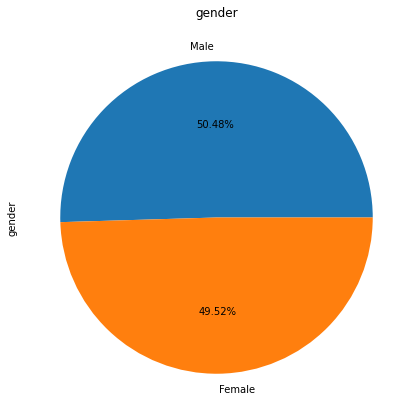

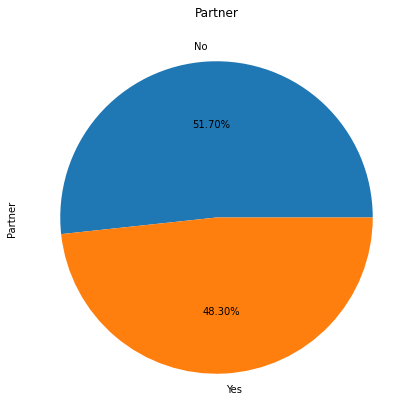

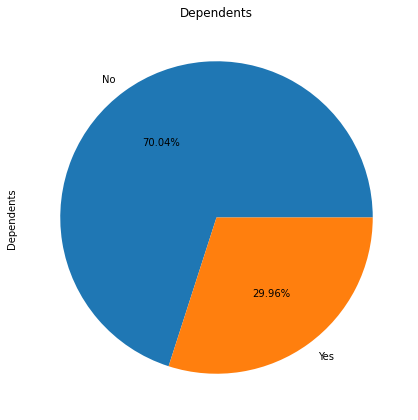

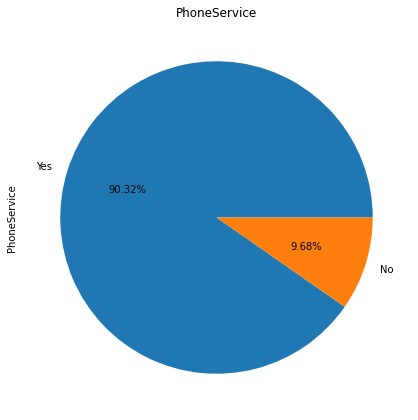

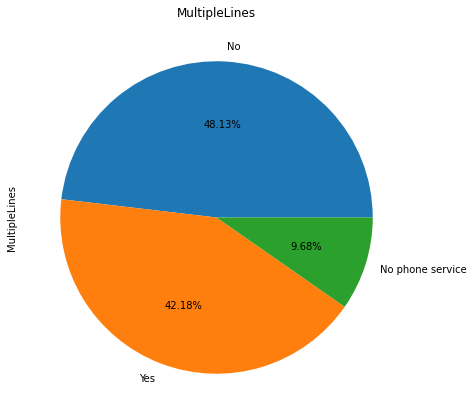

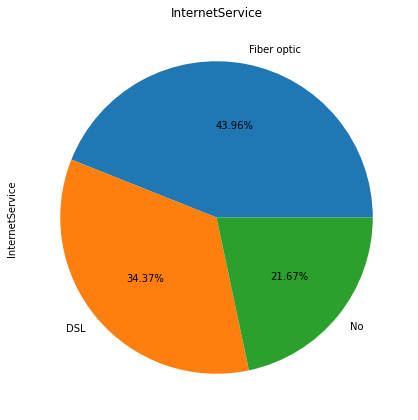

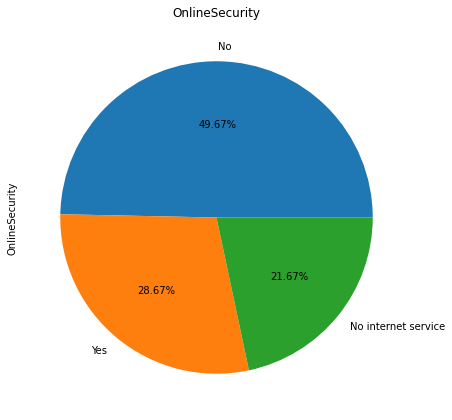

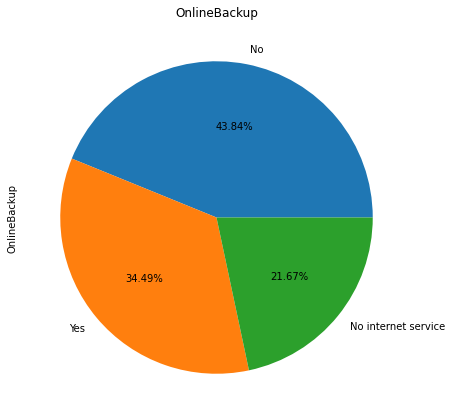

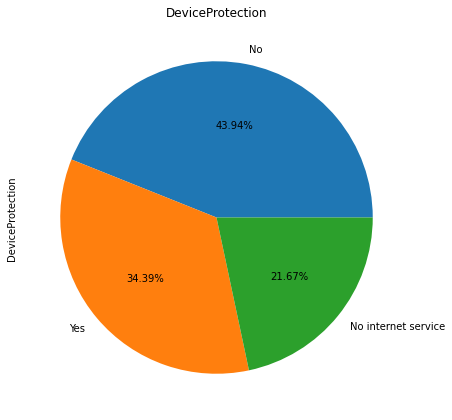

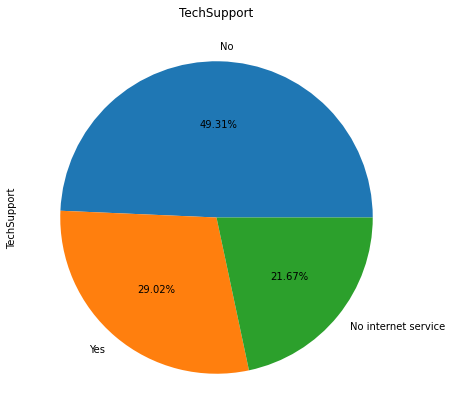

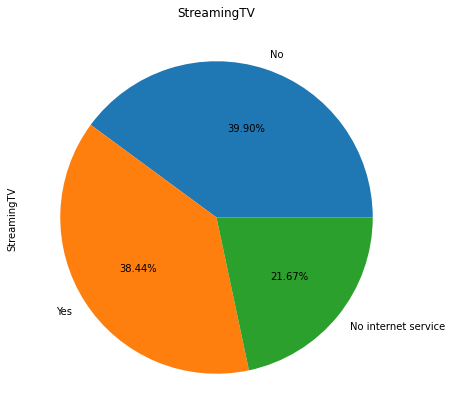

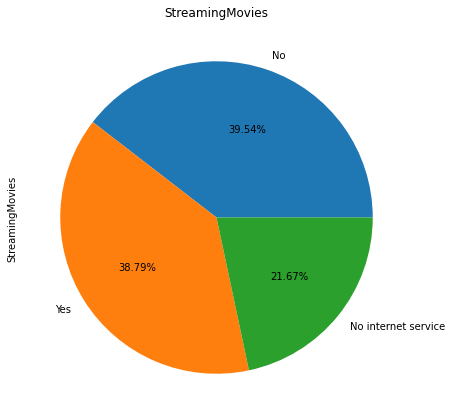

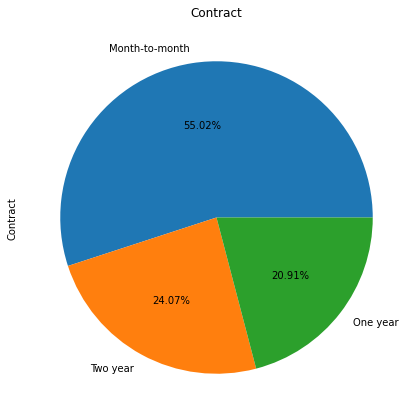

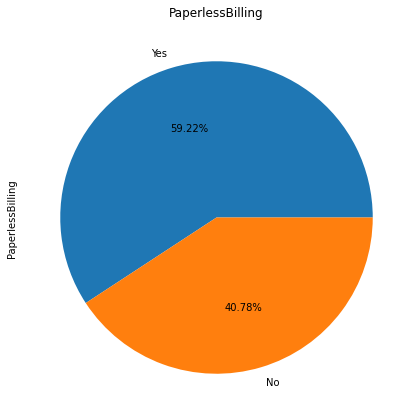

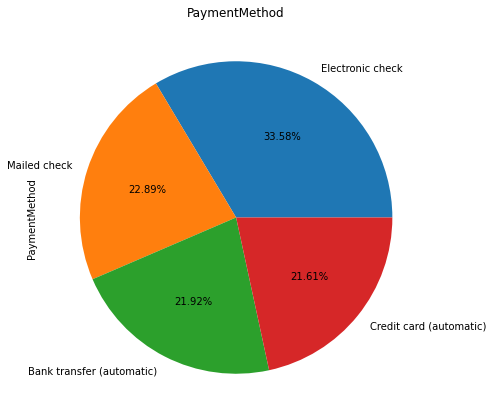

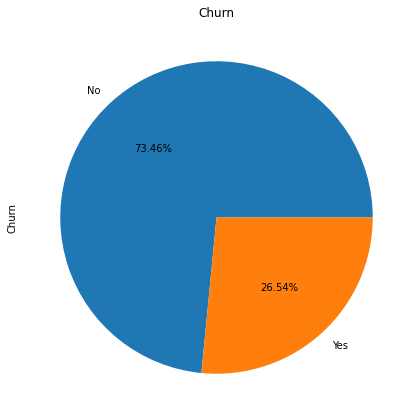

In [9]:
plt.figure(figsize=(20,5))
columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
n = 1
for x in columns:
    plt.figure(figsize=(7,10))
    data[x].value_counts().plot(kind='pie', autopct='%.2f%%')
    plt.title(x)
    n=n+1
    plt.show()
    print('\n')

- Dari piechart dapat dilihat bahwa gender terbanyak adalah laki-laki.

- Sebanyak 51.70% customer memiliki partner dan 48.30% customer tidak memiliki partner

- Customer yang memiliki tanggungan sebesar 29.96% dan 70.04% tidak memiliki tanggungan.

- Sebanyak 90.32% Customer berlangganan Phone Service dan 9.68% customer tidak berlangganan phone service.

- Multiplelines terbagi menjadi 3 kategori, customer yang memiliki multipelines sebanyak 42.18%, yang tidak memiliki sebanyak 48.13% dan sisa nya no phone service

- Sebanyak 43.96% customer berlangganan layanan Fiber Optic, 34.37% berlangganan DSL dan sisa nya tidak berlangganan internet service.

- Sebanyak 49.67% customer berlangganan Online Security, dan sisanya tidak berlangganan Online Security.

- Sebanyak 34.49% customer berlangganan Online Backup, 43.84% tidak berlangganan dan 21.67% tidak ada internet service.

- Sebanyak 34.39% customer berlangganan Device Protection, 43.94% customer tidak berlangganan device protection.

- Sebanyak 49.31% customer tidakk berlangganan layanan Tech Support, 29.02% customer berlangganan techsupport.

- Sebanyak 38.44% customer berlangganan streaming TV, 39.90% customer tidak berlangganan streaming TV, dan sisanya tidak memiliki internet service.

- Sebanyak 38.79% berlangganan Streaming Movies dan sebanyak 39.54% customer tidak berlangganan Streaming Movies.

- Diketahui bahwa, sebanyak 55.02% customer memiliki tipe kontrak month-to-month, 24.07% memiliki kontrak 2 tahun dan 20.91% memiliki kontrak 1 tahun. Artinya customer lebih suka kontrak month-to-month.

- Sebanyak 59.22% Customer sudah memiliki paperless billing, dan sisanya belum memiliki paperless billing.

- Payment method terbanyak adalah Electronic Check, artinya customer lebih suka melakukan pembayaran melalui electronic check dibanding metode yang lain.


# 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [10]:
# Membuat data inference

data_inf = data.sample(15, random_state=30)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2833,5993-JSUWV,Female,0,No,No,66,Yes,No,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Bank transfer (automatic),61.15,4017.45,No
4420,1544-JJMYL,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Credit card (automatic),69.35,1927.30,No
775,8823-RLPWL,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),110.65,8065.65,No
6449,7601-WFVZV,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
5927,6080-LNESI,Male,0,No,No,51,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.75,1234.60,No
5850,6927-WTFIV,Male,1,No,No,20,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),71.30,1389.20,Yes
587,8752-IMQOS,Male,0,Yes,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,85.10,No
2076,7228-PAQPD,Female,0,No,No,14,Yes,No,DSL,No,...,No,Yes,No,Yes,One year,No,Credit card (automatic),59.10,772.85,No
3854,0237-YFUTL,Female,0,Yes,No,50,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),109.65,5405.80,No
2738,2351-BKRZW,Female,0,Yes,Yes,43,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),75.20,3254.35,No


In [11]:
data = data.drop(data_inf.index)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
data_inf.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5993-JSUWV,Female,0,No,No,66,Yes,No,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Bank transfer (automatic),61.15,4017.45,No
1,1544-JJMYL,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Credit card (automatic),69.35,1927.30,No
2,8823-RLPWL,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),110.65,8065.65,No
3,7601-WFVZV,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
4,6080-LNESI,Male,0,No,No,51,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.75,1234.60,No
5,6927-WTFIV,Male,1,No,No,20,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),71.30,1389.20,Yes
6,8752-IMQOS,Male,0,Yes,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,85.10,No
7,7228-PAQPD,Female,0,No,No,14,Yes,No,DSL,No,...,No,Yes,No,Yes,One year,No,Credit card (automatic),59.10,772.85,No
8,0237-YFUTL,Female,0,Yes,No,50,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),109.65,5405.80,No
9,2351-BKRZW,Female,0,Yes,Yes,43,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),75.20,3254.35,No


## Splitting between 'X' (Features) and 'y' (target)

In [13]:
X = data.drop('Churn', axis=1)
y = data['Churn']

Melakukan splitting antara kolom features dan target

In [14]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=data.Churn)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=30)

print("Train Size : ", X_train.shape)
print("Val Size : ", X_val.shape)
print("Test Size : ", X_test.shape)

Train Size :  (4497, 20)
Val Size :  (1125, 20)
Test Size :  (1406, 20)


Membagi data menjadi Train, Validation dan Test Set.

## Cek Missing Value

In [15]:
print('X Train missing valu:',X_train.isnull().sum().sum())
print('X Val missing valu:',X_val.isnull().sum().sum())
print('X Test missing valu:',X_test.isnull().sum().sum())

X Train missing valu: 8
X Val missing valu: 1
X Test missing valu: 2


Terdapat missing value pada data train sebanyak 8, data test sebanyak 1, dan data test sebanyak 2.

## Feature Selection

In [16]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
613,7138-GIRSH,Male,0,No,No,50,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),69.50,3418.20
4740,1682-VCOIO,Male,0,No,No,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.45,481.10
2250,4957-TIALW,Female,0,No,Yes,15,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Credit card (automatic),65.60,1010.00
134,2372-HWUHI,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.35,81.25
475,2359-KMGLI,Male,0,No,No,24,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,80.25,1861.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,5285-MVEHD,Female,0,Yes,No,56,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),105.60,6068.65
4368,7691-XVTZH,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),89.95,5974.30
162,4482-EWFMI,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,135.20
1342,2293-IJWPS,Female,0,Yes,No,57,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),100.75,5985.00


Berdasarkan personal judgement, Column customerID tidak memiliki korelasi dengan kolom lain nya, karena hanya menggambarkan ID dari tiap customer.

In [17]:
X_train = X_train.drop(columns = ['customerID'], axis=1)
X_val = X_val.drop(columns = ['customerID'], axis=1)
X_test = X_test.drop(columns = ['customerID'], axis=1)

Lakukan drop pada column customerID

## Handling Outlier

In [18]:
def diagnostic_plots(X_train, variable):
    plt.figure(figsize=(15,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

Distribusi dan boxplot tenure sebelum capping
Skewness value :  0.21298069069472375


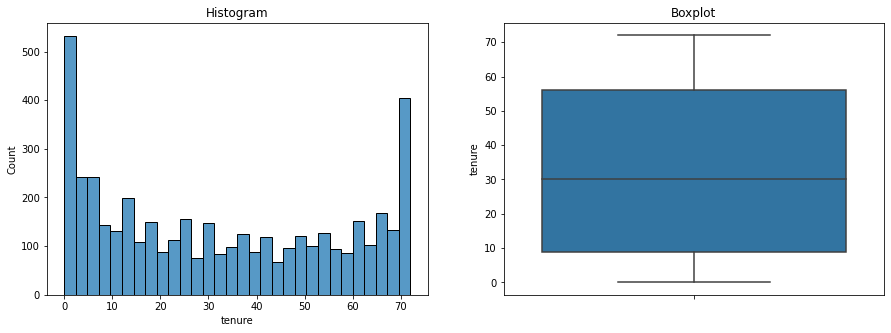

Distribusi dan boxplot MonthlyCharges sebelum capping
Skewness value :  -0.25319183130464085


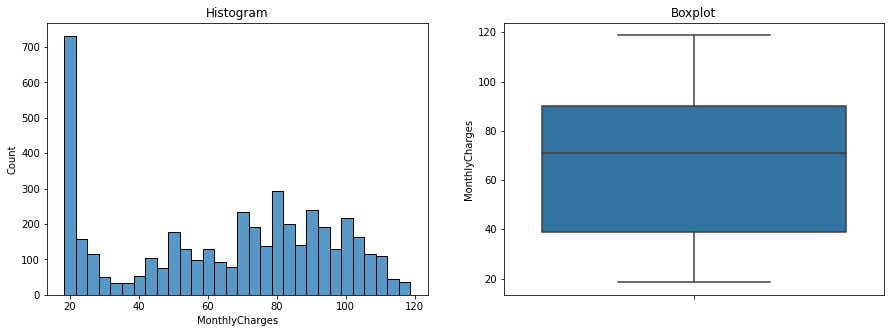

Distribusi dan boxplot TotalCharges sebelum capping
Skewness value :  0.9106217765466679


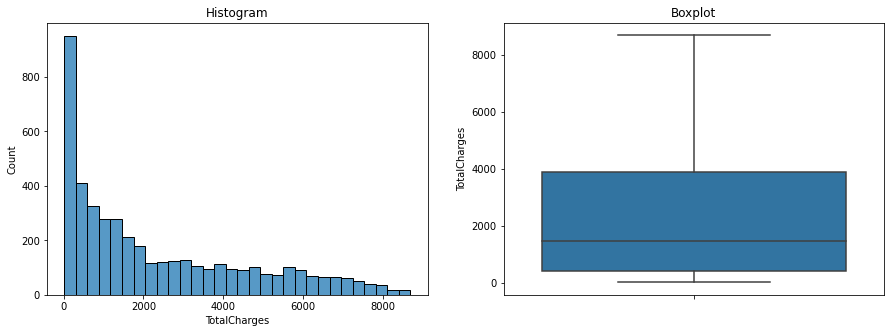

In [19]:
print('Distribusi dan boxplot tenure sebelum capping')
print('Skewness value : ', X_train['tenure'].skew())

diagnostic_plots(X_train, 'tenure')

print('Distribusi dan boxplot MonthlyCharges sebelum capping')
print('Skewness value : ', X_train['MonthlyCharges'].skew())

diagnostic_plots(X_train, 'MonthlyCharges')

print('Distribusi dan boxplot TotalCharges sebelum capping')
print('Skewness value : ', X_train['TotalCharges'].skew())

diagnostic_plots(X_train, 'TotalCharges')


Tidak dilakukan handling outlier dikarenakan sudah tidak ada data yang merupakan outlier.

## Split between numerical Columns and categorical Columns

In [20]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include =['object']).columns.tolist()
print(f'Numerical Columns: ', num_columns)
print(f'Categorical: ', cat_columns)

Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Membagi data menjadi categorical dan numerical, fungsinya untuk dilakukan encoding dan scaling.

## Encoding Target

In [21]:
labelenc = LabelEncoder()
labelenc.fit(y_train)

LabelEncoder()

In [22]:
y_train_encoded = labelenc.transform(y_train)
y_val_encoded = labelenc.transform(y_val)
y_test_encoded = labelenc.transform(y_test)

In [23]:
y_train_final = pd.DataFrame(y_train_encoded, columns=['Churn'])
y_val_final = pd.DataFrame(y_val_encoded, columns=['Churn'])
y_test_final = pd.DataFrame(y_test_encoded, columns=['Churn'])
y_val_final

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
1120,1
1121,0
1122,1
1123,0


# Features Engineering

## Pipeline

In [24]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             MinMaxScaler())

cat_pipeline = make_pipeline(OrdinalEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [25]:
X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(4497, 19)

Pada pipeline ini kita menggunakan MinMaxScaler untuk column categorical dan OrdinalEncoder untuk column categorical

### 5 - Sequential API

#### 5.1 - Model Definition

In [26]:


model_sequential = tf.keras.models.Sequential()
model_sequential.add(tf.keras.layers.Dense(19, activation='relu', input_shape=(X_train.shape[1],),kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(tf.keras.layers.Dense(80, activation='relu')) #hidden layer
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(tf.keras.layers.Dropout(0.1))
model_sequential.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer

Menggunakan 1 hidden layer untuk sequential API sebanyak 80 dengan input sebanyak 19 column.

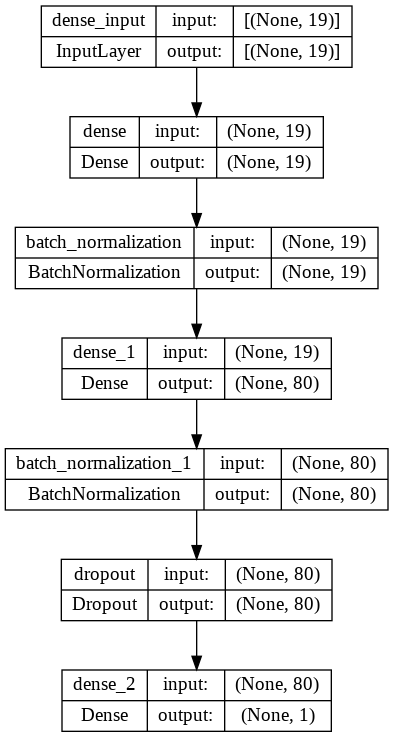

In [27]:
tf.keras.utils.plot_model(model_sequential, show_shapes=True)

Berikut adalah plot untuk model sequential API.

## 5.2 - Model Training

In [28]:
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                380       
                                                                 
 batch_normalization (BatchN  (None, 19)               76        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 80)                1600      
                                                                 
 batch_normalization_1 (Batc  (None, 80)               320       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8

Pada model training dapat dilihat bahwa data diproses dengan 19 inputan, 80 hidden layer dan 1 output

In [29]:
model_sequential.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

In [30]:
history = model_sequential.fit(X_train, y_train_final, epochs=15, batch_size=16, validation_data=(X_val,y_val_final))

Epoch 1/15
282/282 [==============================] - 6s 10ms/step - loss: 0.8574 - accuracy: 0.6998 - val_loss: 0.7260 - val_accuracy: 0.7556
Epoch 2/15
282/282 [==============================] - 2s 7ms/step - loss: 0.6906 - accuracy: 0.7654 - val_loss: 0.6535 - val_accuracy: 0.7751
Epoch 3/15
282/282 [==============================] - 2s 8ms/step - loss: 0.6247 - accuracy: 0.7796 - val_loss: 0.6032 - val_accuracy: 0.7787
Epoch 4/15
282/282 [==============================] - 2s 8ms/step - loss: 0.5764 - accuracy: 0.7816 - val_loss: 0.5606 - val_accuracy: 0.7858
Epoch 5/15
282/282 [==============================] - 2s 7ms/step - loss: 0.5370 - accuracy: 0.7867 - val_loss: 0.5403 - val_accuracy: 0.7831
Epoch 6/15
282/282 [==============================] - 2s 7ms/step - loss: 0.5169 - accuracy: 0.7847 - val_loss: 0.5205 - val_accuracy: 0.7840
Epoch 7/15
282/282 [==============================] - 2s 7ms/step - loss: 0.4953 - accuracy: 0.7945 - val_loss: 0.5078 - val_accuracy: 0.7858
Epoch

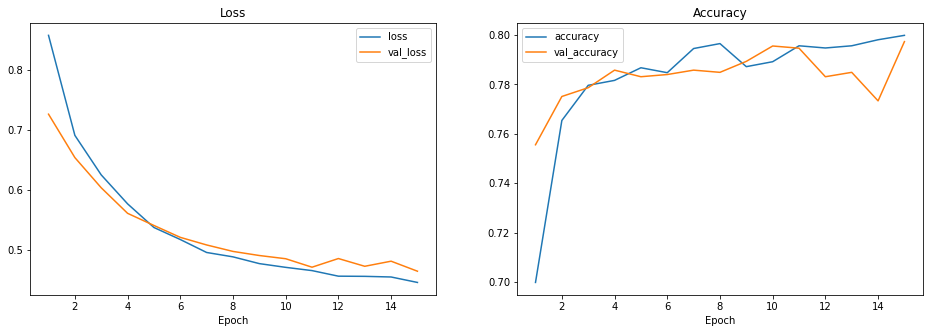

In [31]:
epoch=15

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Dari visual diatas kita dapat melihat bahwa Loss terjadi penurunan tiap epoch nya, dan gap nya tidak terlalu besar. tetapi pada accuracy nya didapat bahwa tidak terlalu baik, dimana terjadi peningkatan tetapi tidak stabil

In [32]:
y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1032
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1406
   macro avg       0.71      0.69      0.70      1406
weighted avg       0.77      0.78      0.77      1406



Pada precision dan recall untuk kategori 0 sudah bagus, tetapi pada kategori 1 masih underfit. Begitu juga dengan accuracy nya yg hanya 79%

# 6 - Functional API

## 6.1 - Model Definition

In [33]:
# Create Functional Model



input_layer = Input(shape=(19,))
hidden1_layer = Dense(32, activation='relu')(input_layer)
hidden2_layer = Dense(16, activation='relu')(hidden1_layer)

concat_layer = concatenate([input_layer, hidden2_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 19)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 32)           640         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 16)           528         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 35)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

Pada Functional API dilakukan input hidden layer sebanyak 2 layer, yaitu 16 dan 8. dan untuk input nya 19 dengan output sebanyak 1.

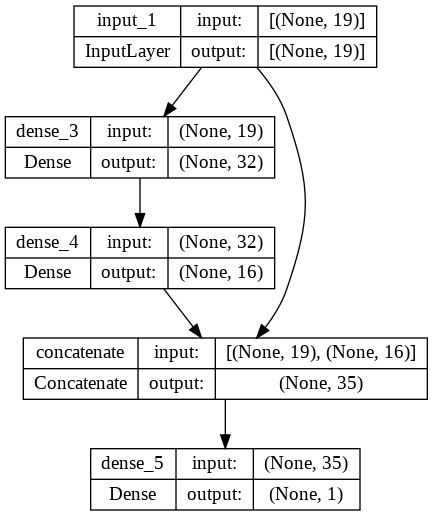

In [34]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 6.2 - Model Training

In [35]:
# Train the Model

%%time 
history_func = model_functional.fit(X_train, 
                                   y_train_final, 
                                   epochs=10, 
                                   validation_data=(X_val, y_val_final), 
                                   batch_size=10)

Epoch 1/10
450/450 [==============================] - 2s 3ms/step - loss: 0.4830 - accuracy: 0.7534 - val_loss: 0.4529 - val_accuracy: 0.7840
Epoch 2/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4355 - accuracy: 0.7925 - val_loss: 0.4607 - val_accuracy: 0.7822
Epoch 3/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4271 - accuracy: 0.7981 - val_loss: 0.4459 - val_accuracy: 0.7938
Epoch 4/10
450/450 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.7992 - val_loss: 0.4410 - val_accuracy: 0.7956
Epoch 5/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4191 - accuracy: 0.8005 - val_loss: 0.4380 - val_accuracy: 0.8000
Epoch 6/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4156 - accuracy: 0.8036 - val_loss: 0.4439 - val_accuracy: 0.7947
Epoch 7/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8025 - val_loss: 0.4358 - val_accuracy: 0.7947
Epoch 

Dilakukan training untuk model functional dengan epochs 10 dan batch size 10.

## 6.3 - Model Evaluation

In [36]:
# Create DataFrame

history_functional_df = pd.DataFrame(history_func.history)
history_functional_df

,loss,accuracy,val_loss,val_accuracy
0,0.483020,0.753391,0.452868,0.784000
1,0.435496,0.792528,0.460689,0.782222
2,0.427112,0.798088,0.445873,0.793778
3,0.421616,0.799199,0.440999,0.795556
4,0.419105,0.800534,0.438029,0.800000
5,0.415612,0.803647,0.443913,0.794667
6,0.412353,0.802535,0.435759,0.794667
7,0.409564,0.804092,0.437474,0.792000
8,0.407594,0.808539,0.434755,0.792889
9,0.406420,0.808761,0.431704,0.798222


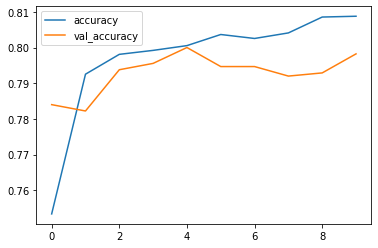

In [37]:
# Plot between accuracy and val_accuracy

history_functional_df[['accuracy', 'val_accuracy']].plot()

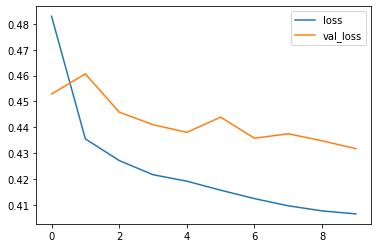

In [38]:
# Plot between loss and val_loss

history_functional_df[['loss', 'val_loss']].plot()

Dari visualisasi diatas dapat dilihat bahwa loss dan accuracy nya masih belum optimal, karena grafik nya semakin ke kanan semakin melebar dan tidak beraturan

In [39]:
y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1032
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1406
   macro avg       0.74      0.70      0.71      1406
weighted avg       0.78      0.79      0.78      1406



Untuk classification report, pada label 0 precision dan recal memiliki nilai yang baik yaitu 83% dan 91%, tetapi sangat jauh berbeda dengan label 1 dimana hanya 66% dan 47%. ini menandakan bahwa data masih underfitting. Dilihat dari accuracy nya hanya memiliki 79% accuracy data.

## Model Tuning

## Sequential API

In [40]:
model_sequential.add(tf.keras.layers.Dense(19, activation='relu', input_shape=(X_train.shape[1],),kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(tf.keras.layers.Dense(120, activation='relu')) #hidden layer
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(tf.keras.layers.Dense(60, activation='relu')) #hidden layer
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(tf.keras.layers.Dropout(0.1))
model_sequential.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer

Melakukan tuning model pada Sequential API dengan menambahkan 1 hidden layer lagi.

In [41]:
model_sequential.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

In [42]:
history = model_sequential.fit(X_train, y_train_final, epochs=8, batch_size=10, validation_data=(X_val,y_val_final))

Epoch 1/8
450/450 [==============================] - 4s 5ms/step - loss: 0.8742 - accuracy: 0.7569 - val_loss: 0.7482 - val_accuracy: 0.7760
Epoch 2/8
450/450 [==============================] - 2s 4ms/step - loss: 0.6814 - accuracy: 0.7845 - val_loss: 0.6284 - val_accuracy: 0.7796
Epoch 3/8
450/450 [==============================] - 2s 5ms/step - loss: 0.5800 - accuracy: 0.7816 - val_loss: 0.5834 - val_accuracy: 0.7191
Epoch 4/8
450/450 [==============================] - 2s 4ms/step - loss: 0.5320 - accuracy: 0.7754 - val_loss: 0.5087 - val_accuracy: 0.7884
Epoch 5/8
450/450 [==============================] - 2s 5ms/step - loss: 0.4995 - accuracy: 0.7823 - val_loss: 0.4925 - val_accuracy: 0.7831
Epoch 6/8
450/450 [==============================] - 2s 5ms/step - loss: 0.4832 - accuracy: 0.7785 - val_loss: 0.4976 - val_accuracy: 0.7804
Epoch 7/8
450/450 [==============================] - 2s 5ms/step - loss: 0.4730 - accuracy: 0.7834 - val_loss: 0.4668 - val_accuracy: 0.7769
Epoch 8/8
450

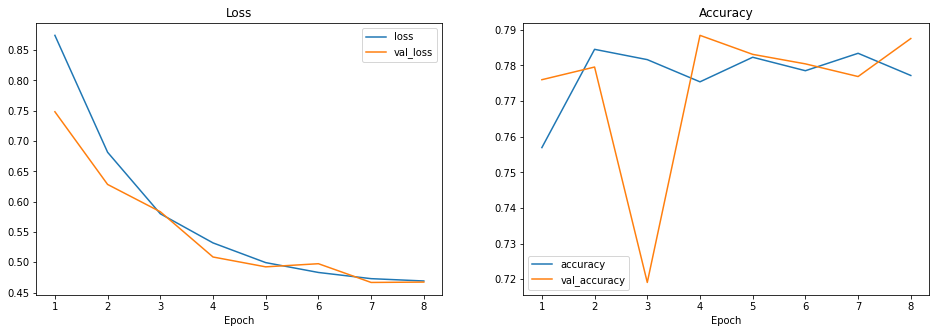

In [43]:
epoch=8

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

In [44]:
y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1032
           1       0.64      0.44      0.52       374

    accuracy                           0.79      1406
   macro avg       0.73      0.67      0.69      1406
weighted avg       0.77      0.79      0.77      1406



Dari hasil tuning dapat terlihat bahwa, penambahan hidden layer tidak selalu membuat data menjadi lebih baik, buktinya hasil penambahan hidden layer malah menjadi lebih buruk hasil nya dari pada sebelum ditambahkan hidden layer lagi.

## Functional API

In [45]:
input_layer = Input(shape=(19,))
hidden1_layer = Dense(32, activation='relu')(input_layer)
hidden2_layer = Dense(16, activation='relu')(hidden1_layer)
hidden3_layer = Dense(8, activation='relu')(hidden2_layer)

concat_layer = concatenate([input_layer, hidden2_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 19)]         0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 32)           640         ['input_2[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 16)           528         ['dense_10[0][0]']               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 35)           0           ['input_2[0][0]',                
                                                                  'dense_11[0][0]']         

In [46]:
%%time 
history_func_tuning = model_functional.fit(X_train, 
                                   y_train_final, 
                                   epochs=10, 
                                   validation_data=(X_val, y_val_final), 
                                   batch_size=10)

Epoch 1/10
450/450 [==============================] - 2s 3ms/step - loss: 0.4886 - accuracy: 0.7529 - val_loss: 0.4587 - val_accuracy: 0.7884
Epoch 2/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4300 - accuracy: 0.7945 - val_loss: 0.4454 - val_accuracy: 0.7973
Epoch 3/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4238 - accuracy: 0.7981 - val_loss: 0.4420 - val_accuracy: 0.7956
Epoch 4/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4205 - accuracy: 0.8003 - val_loss: 0.4385 - val_accuracy: 0.7929
Epoch 5/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4191 - accuracy: 0.8028 - val_loss: 0.4361 - val_accuracy: 0.8027
Epoch 6/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8048 - val_loss: 0.4337 - val_accuracy: 0.8009
Epoch 7/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4125 - accuracy: 0.8043 - val_loss: 0.4351 - val_accuracy: 0.7956
Epoch 

In [47]:
history_functional_tuning_df = pd.DataFrame(history_func_tuning.history)
history_functional_tuning_df

,loss,accuracy,val_loss,val_accuracy
0,0.488566,0.752946,0.458668,0.788444
1,0.430005,0.794530,0.445382,0.797333
2,0.423826,0.798088,0.442014,0.795556
3,0.420470,0.800311,0.438545,0.792889
4,0.419129,0.802757,0.436141,0.802667
5,0.414176,0.804759,0.433664,0.800889
6,0.412523,0.804314,0.435099,0.795556
7,0.411113,0.808094,0.431765,0.803556
8,0.410427,0.804314,0.437228,0.784000
9,0.407193,0.807872,0.431224,0.796444


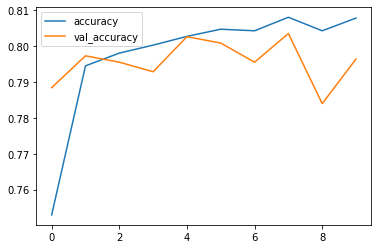

In [48]:
history_functional_tuning_df[['accuracy', 'val_accuracy']].plot()

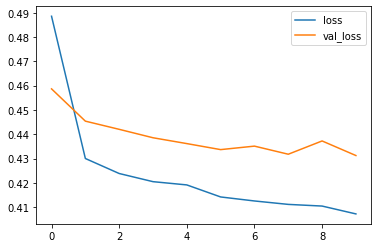

In [49]:
history_functional_tuning_df[['loss', 'val_loss']].plot()

In [50]:
y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1032
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1406
   macro avg       0.74      0.70      0.71      1406
weighted avg       0.78      0.79      0.78      1406



Dari hasil tuning dapat terlihat bahwa, penambahan hidden layer tidak selalu membuat data menjadi lebih baik, buktinya hasil penambahan hidden layer malah menjadi lebih buruk hasil nya dari pada sebelum ditambahkan hidden layer lagi.

# 7. Model Saving

In [51]:
# Save Pipeline

with open('final_pipeline.pkl', 'wb') as file_1:
  joblib.dump(final_pipeline, file_1)

In [52]:
# Summary of Model Sequential

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                380       
                                                                 
 batch_normalization (BatchN  (None, 19)               76        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 80)                1600      
                                                                 
 batch_normalization_1 (Batc  (None, 80)               320       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8

In [53]:
model_functional.trainable = False
model_functional.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 19)]         0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 32)           640         ['input_2[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 16)           528         ['dense_10[0][0]']               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 35)           0           ['input_2[0][0]',                
                                                                  'dense_11[0][0]']         

In [54]:
model_sequential.save('churn_model.h5')

# - Model Inference

In [55]:
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5993-JSUWV,Female,0,No,No,66,Yes,No,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Bank transfer (automatic),61.15,4017.45,No
1,1544-JJMYL,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Credit card (automatic),69.35,1927.30,No
2,8823-RLPWL,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),110.65,8065.65,No
3,7601-WFVZV,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
4,6080-LNESI,Male,0,No,No,51,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.75,1234.60,No
5,6927-WTFIV,Male,1,No,No,20,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),71.30,1389.20,Yes
6,8752-IMQOS,Male,0,Yes,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,85.10,No
7,7228-PAQPD,Female,0,No,No,14,Yes,No,DSL,No,...,No,Yes,No,Yes,One year,No,Credit card (automatic),59.10,772.85,No
8,0237-YFUTL,Female,0,Yes,No,50,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),109.65,5405.80,No
9,2351-BKRZW,Female,0,Yes,Yes,43,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),75.20,3254.35,No


In [56]:
with open('final_pipeline.pkl', 'rb') as file_1:
  model_pipeline = joblib.load(file_1)

from tensorflow.keras.models import load_model
model_ann = load_model('churn_model.h5')

In [57]:
data_inf_transform = model_pipeline.transform(data_inf)
data_inf_transform

array([[0.00000000e+00, 9.16666667e-01, 4.26008969e-01, 4.61418186e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 2.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.75000000e-01, 5.07722970e-01, 2.20228479e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        2.00000000e+00, 2.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 9.19282511e-01, 9.28554120e-01,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00, 1.00000000e+00, 2.00000000e+00, 2.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 2.00000000e+00, 2.00000000e+00,
        2.00000000e+00

In [58]:
y_pred_inf = model_ann.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 'Yes', 'No')
y_pred_inf

1/1 [==============================] - 0s 170ms/step


array([['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No']], dtype='<U3')

In [59]:
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Functional Prediction'])

In [60]:
pred_inf = pd.concat([data_inf['Churn'], y_pred_inf_df], axis=1)
pred_inf

,Churn,Functional Prediction
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
5,Yes,No
6,No,No
7,No,No
8,No,No
9,No,No


In [61]:
print(classification_report(data_inf['Churn'], y_pred_inf_df))

              precision    recall  f1-score   support

          No       0.93      1.00      0.97        14
         Yes       0.00      0.00      0.00         1

    accuracy                           0.93        15
   macro avg       0.47      0.50      0.48        15
weighted avg       0.87      0.93      0.90        15



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil klasifikasi model inference cukup baik, dimana dari 15 data inference, 14 data dapat terprediksi dengan benar.

Untuk accuracy nya juga mencapai 93%, precision untuk label 'No' mencapai 93% dan recall 100%. Untuk label 'Yes' 0 dikarenakan untuk label 'Yes' di data inference hanya ada 1 data saja.

# 11 - Pengambilan Kesimpulan



- Dari hasil percobaan menggunakan 2 model yaitu, Sequential API dan Functional API didapat bahwa Sequential API lebih baik memprediksi data dibandingkan Functional API.

- Setelah dilakukan tunning pada kedua model tersebut didapatkan bahwa penambahan hidden layer saja tidak cukup untuk membuat model menjadi lebih baik lagi, begitupun penambahan epochs.

Dari EDA kita bisa melihat bahwa :

  - Dari SeniorCitizen kolom, Jumlah Customer Churn paling banyak adalah dengan label 1 yaitu senior citizen.

  - Dari tenure kolom, jumlah customer churn paling banyak adalah customer yang tidak memiliki tenure.

  - Dari perbandingan MonthlyCharges dan churn, jumlah *customer* churn terbanyak adalah customer yang memiliki monthly charge